# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [1]:
import pandas as pd

path = '/kaggle/input/microsoftchallenge3/wine.csv'
data = pd.read_csv(path)
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
79,12.70,3.87,2.40,23.0,101,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463,1
119,12.00,3.43,2.00,19.0,87,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564,1
66,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502,1
57,13.29,1.97,2.68,16.8,102,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270,0
90,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480,1
72,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472,1
36,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880,0
127,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466,1
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830,0
160,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520,2


Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

Label and Feature assignment

In [2]:
features = ['Alcohol','Malic_acid','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color_intensity','Hue','OD280_315_of_diluted_wines','Proline']
label = 'WineVariety'
X, y = data[features].values, data[label].values

Comparing distribution and box plots of features

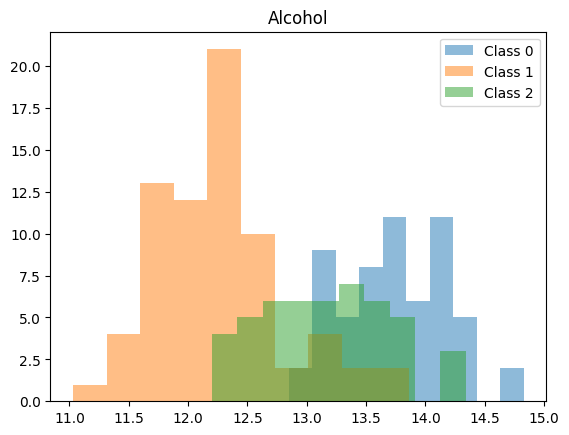

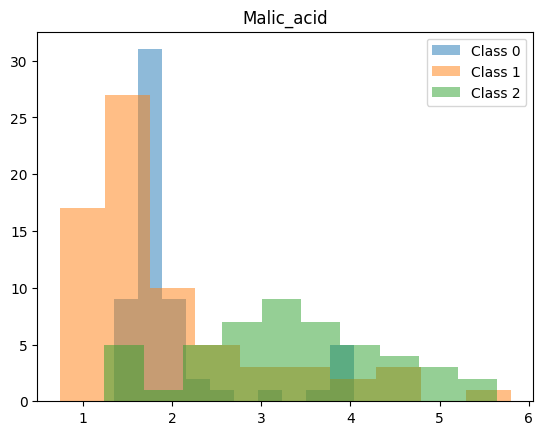

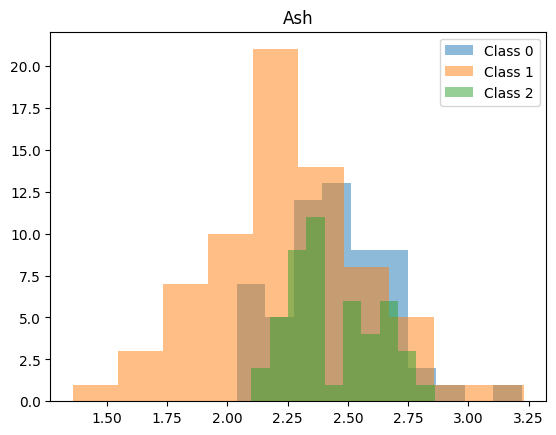

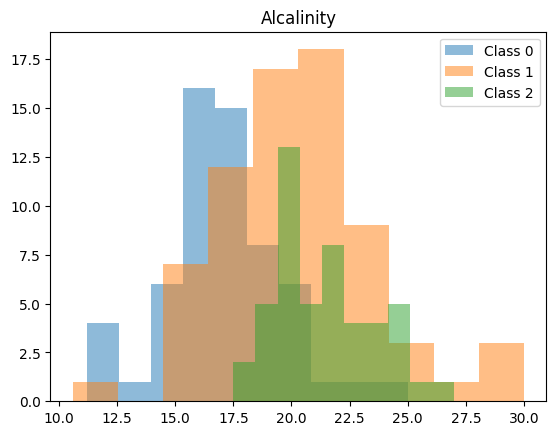

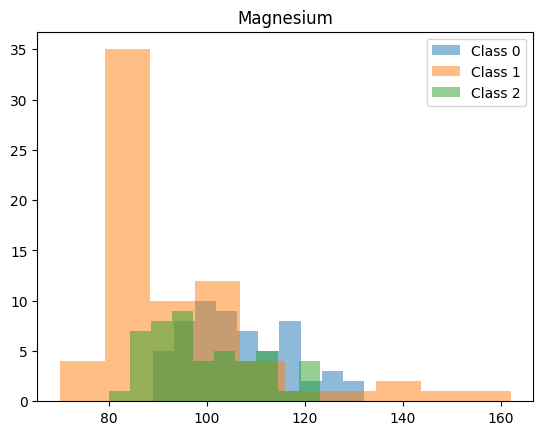

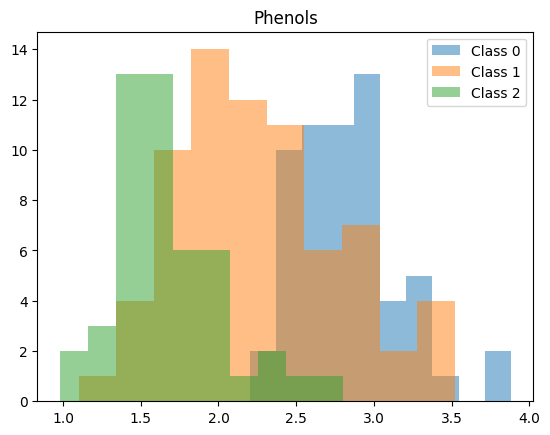

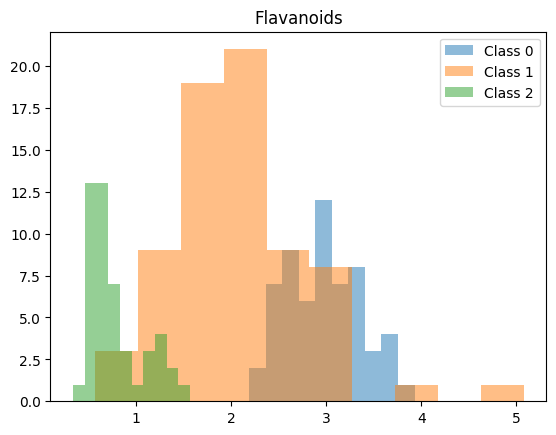

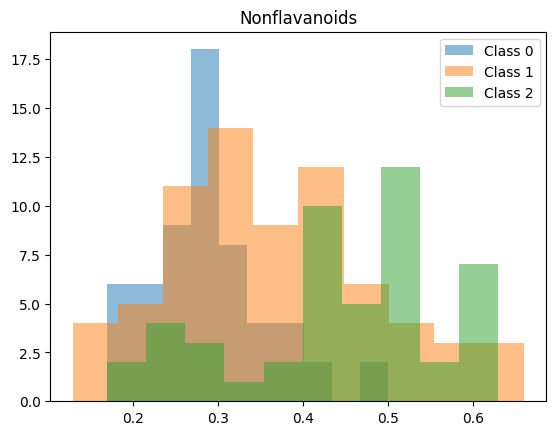

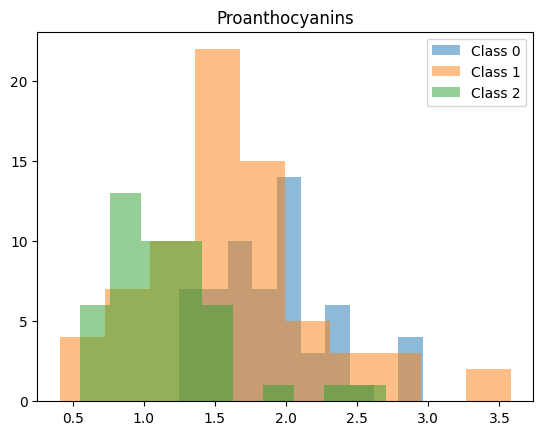

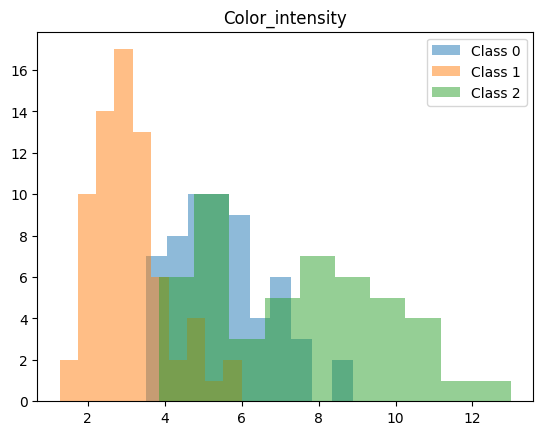

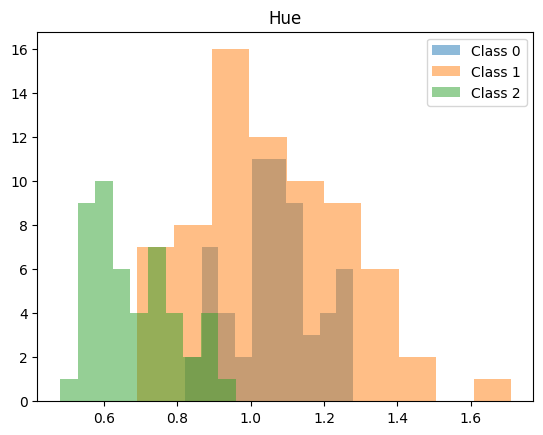

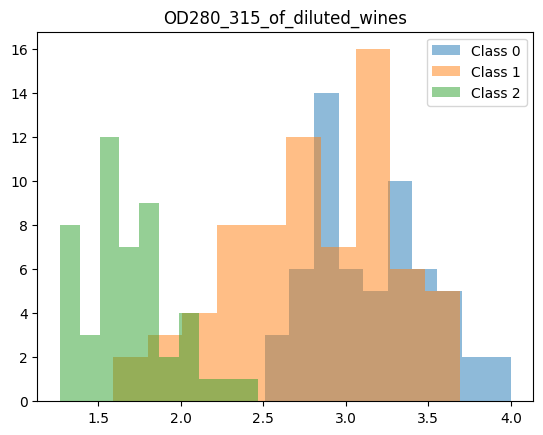

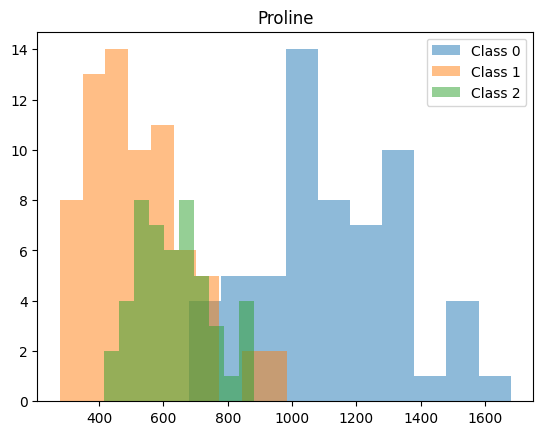

In [3]:
import matplotlib.pyplot as plt

# Create a separate histogram for each feature
for feature in features:
    plt.hist(data[data[label] == 0][feature], alpha=0.5, label='Class 0')
    plt.hist(data[data[label] == 1][feature], alpha=0.5, label='Class 1')
    plt.hist(data[data[label] == 2][feature], alpha=0.5, label='Class 2')
    plt.legend(loc='upper right')
    plt.title(feature)
    plt.show()

Splitting Data for Training and Validation

In [4]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


Normalize Features and Train the model(s)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

feature_columns = [0, 1, 2, 3, 4, 5, 6]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)
    ])

# Create a list of classifier algortithms to use
classifiers = [
    LogisticRegression(solver='lbfgs', multi_class='auto'),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(kernel='linear', probability=True),
    KNeighborsClassifier(),
    GaussianNB()
]




Evaluate the model(s)

LogisticRegression
Overall Accuracy: 0.98
Overall Precision: 0.99
Overall Recall: 0.97


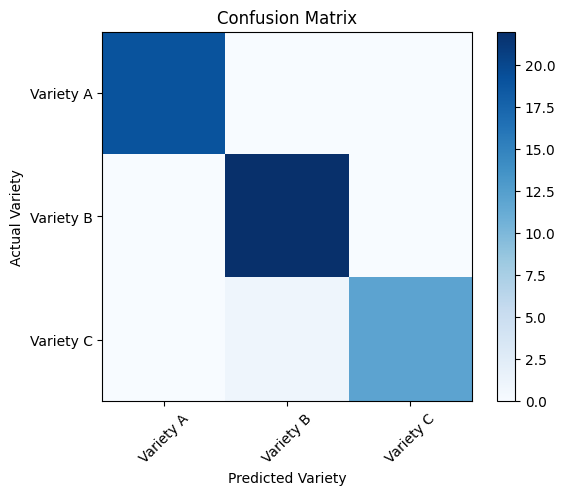


DecisionTreeClassifier
Overall Accuracy: 0.93
Overall Precision: 0.94
Overall Recall: 0.92


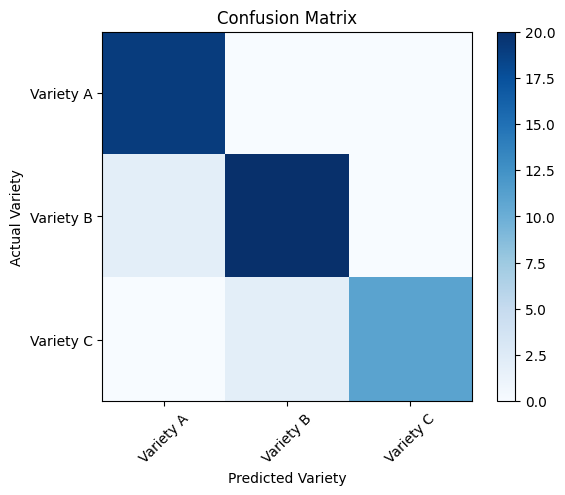


RandomForestClassifier
Overall Accuracy: 0.96
Overall Precision: 0.97
Overall Recall: 0.96


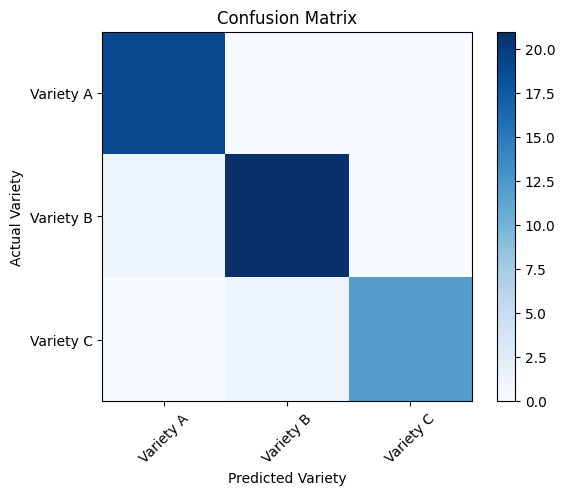


SVC
Overall Accuracy: 0.94
Overall Precision: 0.95
Overall Recall: 0.94


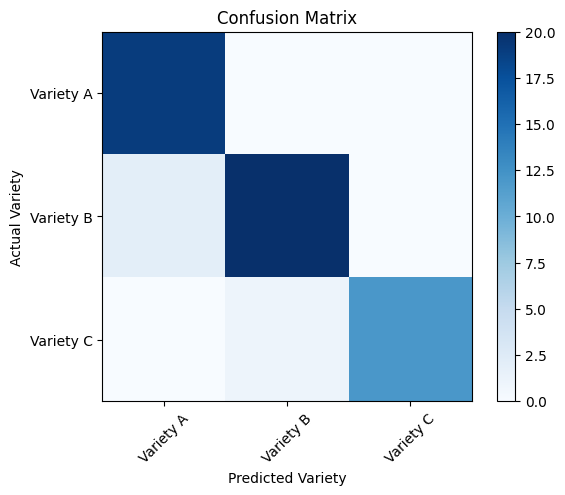


KNeighborsClassifier
Overall Accuracy: 0.96
Overall Precision: 0.97
Overall Recall: 0.97


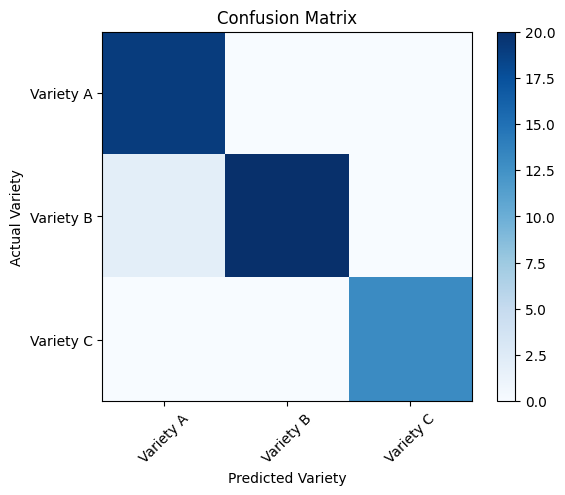


GaussianNB
Overall Accuracy: 0.96
Overall Precision: 0.97
Overall Recall: 0.96


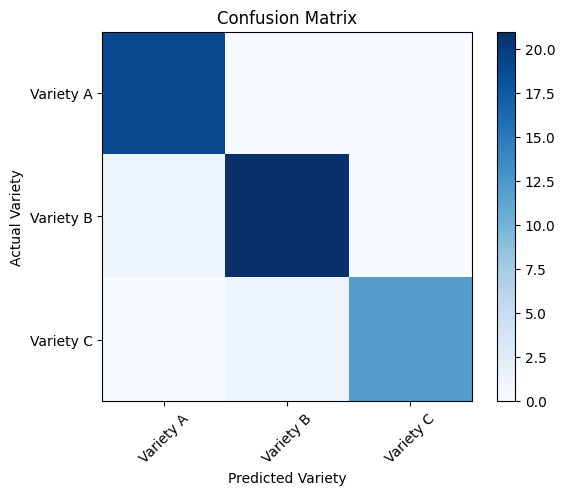

In [6]:
from sklearn. metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

for classifier in classifiers:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)])
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    print(f"{classifier.__class__.__name__}")
    print("Overall Accuracy:",round(accuracy_score(y_test, predictions),2))
    print("Overall Precision:",round(precision_score(y_test, predictions, average='macro'),2))
    print("Overall Recall:",round(recall_score(y_test, predictions, average='macro'),2))
    
    cm = confusion_matrix(y_test, predictions)
    classes = ['Variety A','Variety B','Variety C']
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.title('Confusion Matrix')
    plt.xlabel("Predicted Variety")
    plt.ylabel("Actual Variety")
    plt.show()
    print("=====================================\n")


ROC and AUC Calculation

LogisticRegression : Average AUC: 1.0


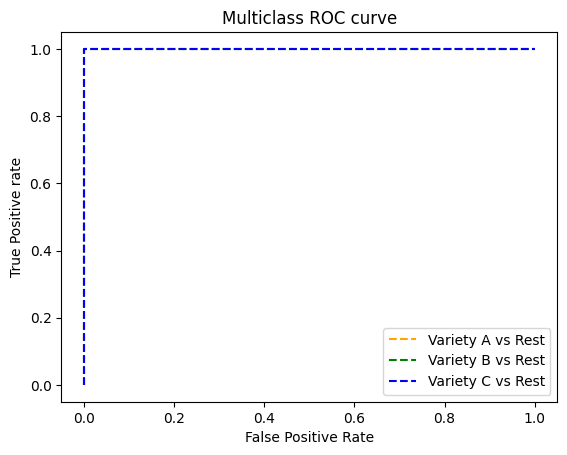


DecisionTreeClassifier : Average AUC: 0.939266983016983


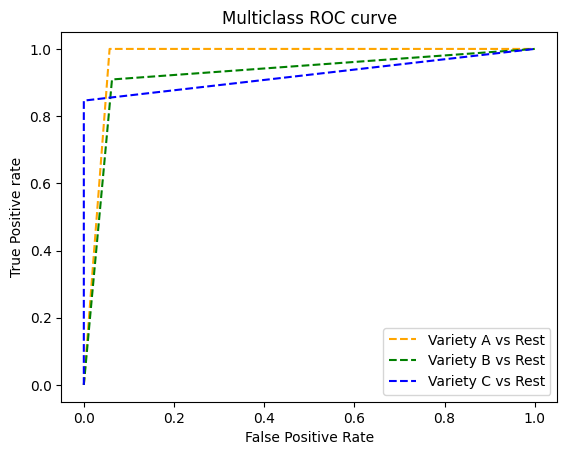


RandomForestClassifier : Average AUC: 0.9995265151515151


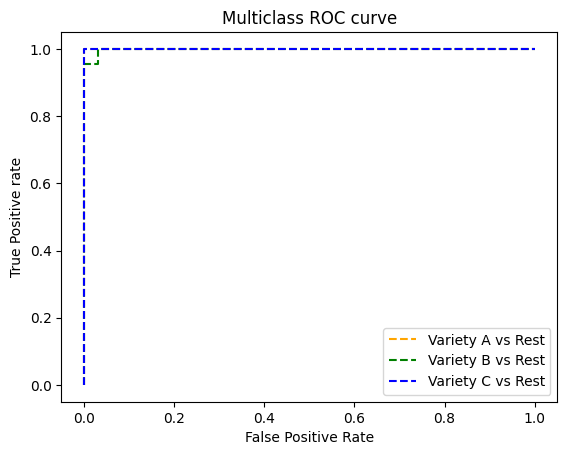


SVC : Average AUC: 0.9971035543403964


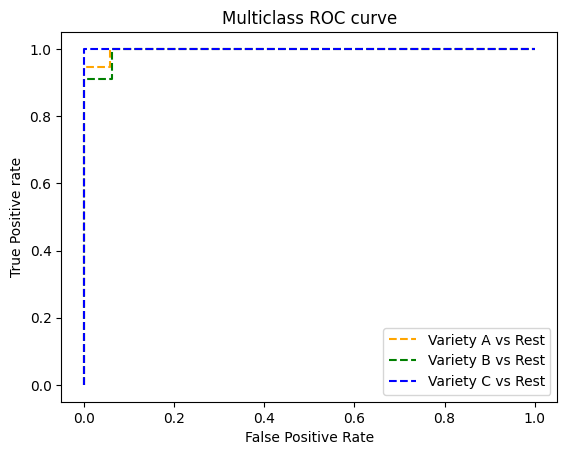


KNeighborsClassifier : Average AUC: 1.0


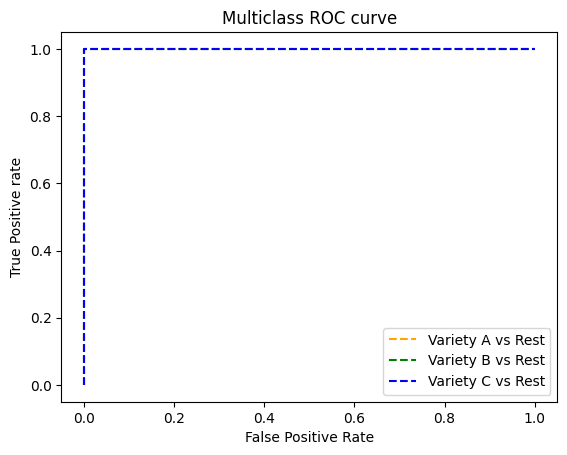


GaussianNB : Average AUC: 0.9979541545852522


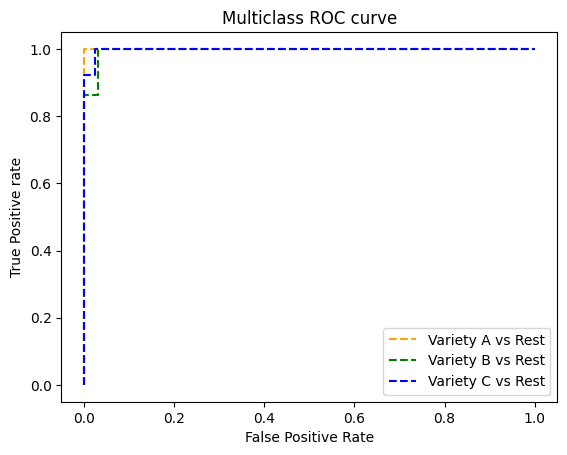

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score

for classifier in classifiers:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])
    probabilities = pipeline.predict_proba(X_test)

    auc = roc_auc_score(y_test,probabilities, multi_class='ovr')
    print(f"{classifier.__class__.__name__} : Average AUC:", auc)
    fpr = {}
    tpr = {}
    thresh ={}
    for i in range(len(classes)):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, probabilities[:,i], pos_label=i)

    plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=classes[0] + ' vs Rest')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=classes[1] + ' vs Rest')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=classes[2] + ' vs Rest')
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.show()
    print("=====================================\n")

## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [8]:
X_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])

for classifier in classifiers:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])
    results = pipeline.predict(X_new)
    print(f'{pipeline.__class__.__name__}: Predictions = {results}')

Pipeline: Predictions = [0 1]
Pipeline: Predictions = [0 1]
Pipeline: Predictions = [0 1]
Pipeline: Predictions = [0 1]
Pipeline: Predictions = [0 1]
Pipeline: Predictions = [0 1]
